**Data Cleaning**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [20]:
df=pd.read_excel("quantity_wise.xlsx")

In [21]:
df['Market'] = pd.to_datetime(df['Market'], format='%Y')
df['Market']=df['Market'].dt.year
df.set_index('Market', inplace=True)

In [22]:
df['Japan_Cbrt']=np.cbrt(df['Japan'])
df['USA_Cbrt']=np.cbrt(df['USA'])
df['European_Union_Cbrt']=np.cbrt(df['European_Union'])
df['China_Cbrt']=np.cbrt(df['China'])
df['South_East_Asia_Cbrt']=np.cbrt(df['South_East_Asia'])
df['Middle_East_Cbrt']=np.cbrt(df['Middle_East'])
df['Others_Cbrt']=np.cbrt(df['Others'])


In [23]:
def plot_series(historical_data, forecast_data):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 3, 1)
    plt.plot(historical_data.index, historical_data['Japan_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Japan_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Japan')

    plt.subplot(3, 3, 2)
    plt.plot(historical_data.index, historical_data['USA_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['USA_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('USA')

    plt.subplot(3, 3, 3)
    plt.plot(historical_data.index, historical_data['European_Union_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['European_Union_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('European Union')

    plt.subplot(3, 3, 4)
    plt.plot(historical_data.index, historical_data['China_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['China_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('China')

    plt.subplot(3, 3, 5)
    plt.plot(historical_data.index, historical_data['South_East_Asia_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['South_East_Asia_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('South East Asia')

    plt.subplot(3, 3, 6)
    plt.plot(historical_data.index, historical_data['Middle_East_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Middle_East_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Middle East')

    plt.subplot(3, 3, 7)
    plt.plot(historical_data.index, historical_data['Others_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Others_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Others')

    plt.tight_layout()
    plt.show()


**Determining stationarity of Data**

In [24]:
def stationary_test(dataframe,column):
  print("For the column {}".format(column))
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[1],index=['p-value'])
  print(stats)
  dataframe.dropna(inplace=True)

In [25]:
stationary_test(df,'Japan_Cbrt')
stationary_test(df,'USA_Cbrt')
stationary_test(df,'European_Union_Cbrt')
stationary_test(df,'China_Cbrt')
stationary_test(df,'South_East_Asia_Cbrt')
stationary_test(df,'Middle_East_Cbrt')
stationary_test(df,'Others_Cbrt')

For the column Japan_Cbrt
p-value    0.992759
dtype: float64
For the column USA_Cbrt
p-value    0.939802
dtype: float64
For the column European_Union_Cbrt
p-value    0.014545
dtype: float64
For the column China_Cbrt
p-value    0.421726
dtype: float64
For the column South_East_Asia_Cbrt
p-value    0.876076
dtype: float64
For the column Middle_East_Cbrt
p-value    0.927822
dtype: float64
For the column Others_Cbrt
p-value    0.834021
dtype: float64


**Dividing Data into Training and Testing**

Total RMSE 96116.60328790967
Japan RMSE: 26477.600945236973
USA RMSE: 68275.00243340169
European Union RMSE: 23793.693398579097
China RMSE: 66271.07147465568
South East Asia RMSE: 225936.31385731208
Middle East RMSE: 21746.27814253624
Others RMSE: 53180.423011807274


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


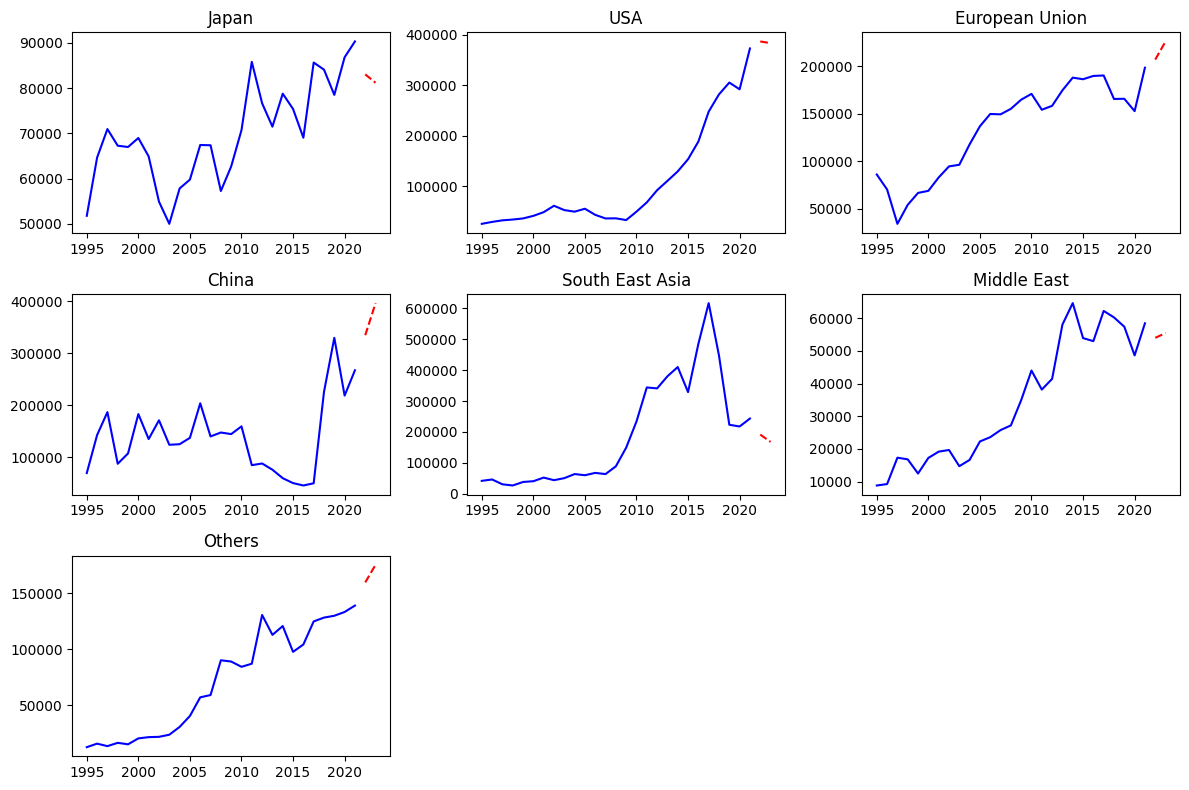

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     12:05:34
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -13.2156
Nobs:                     26.0000    HQIC:                  -15.1450
Log likelihood:           4.78218    FPE:                1.40076e-07
AIC:                     -15.9253    Det(Omega_mle):     2.14203e-08
--------------------------------------------------------------------
Results for equation Japan_Cbrt
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.110578         0.134148            0.824           0.410
L1.Japan_Cbrt                   0.296583         0.274081            1.082           0.279
L1.USA_Cbrt    

In [26]:
train=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']].iloc[0:27]

test=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']].iloc[27:]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
train=np.power(train,3)
test=np.power(test,3)
forecast_data=np.power(forecast_data,3)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Japan RMSE:", np.sqrt(mean_squared_error(test['Japan_Cbrt'], forecast_data['Japan_Cbrt'])))
print("USA RMSE:", np.sqrt(mean_squared_error(test['USA_Cbrt'], forecast_data['USA_Cbrt'])))
print("European Union RMSE:", np.sqrt(mean_squared_error(test['European_Union_Cbrt'], forecast_data['European_Union_Cbrt'])))
print("China RMSE:", np.sqrt(mean_squared_error(test['China_Cbrt'], forecast_data['China_Cbrt'])))
print("South East Asia RMSE:", np.sqrt(mean_squared_error(test['South_East_Asia_Cbrt'], forecast_data['South_East_Asia_Cbrt'])))
print("Middle East RMSE:", np.sqrt(mean_squared_error(test['Middle_East_Cbrt'], forecast_data['Middle_East_Cbrt'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Cbrt'], forecast_data['Others_Cbrt'])))
plot_series(train.dropna(),forecast_data.dropna())
print(results.summary())


**Using the Entire Data for Training and Testing**

Total RMSE 889481.4100632532
Japan RMSE: 67011.4277734584
USA RMSE: 1074802.847815697
European Union RMSE: 406032.72807509993
China RMSE: 289637.3704622858
South East Asia RMSE: 1797980.2647313168
Middle East RMSE: 224083.3159577702
Others RMSE: 920244.4302039985
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     12:05:34
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -13.8834
Nobs:                     28.0000    HQIC:                  -15.7333
Log likelihood:           9.55735    FPE:                7.29639e-08
AIC:                     -16.5478    Det(Omega_mle):     1.25631e-08
--------------------------------------------------------------------
Results for equation Japan_Cbrt
                             coefficient       std. error           t-stat            prob
------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


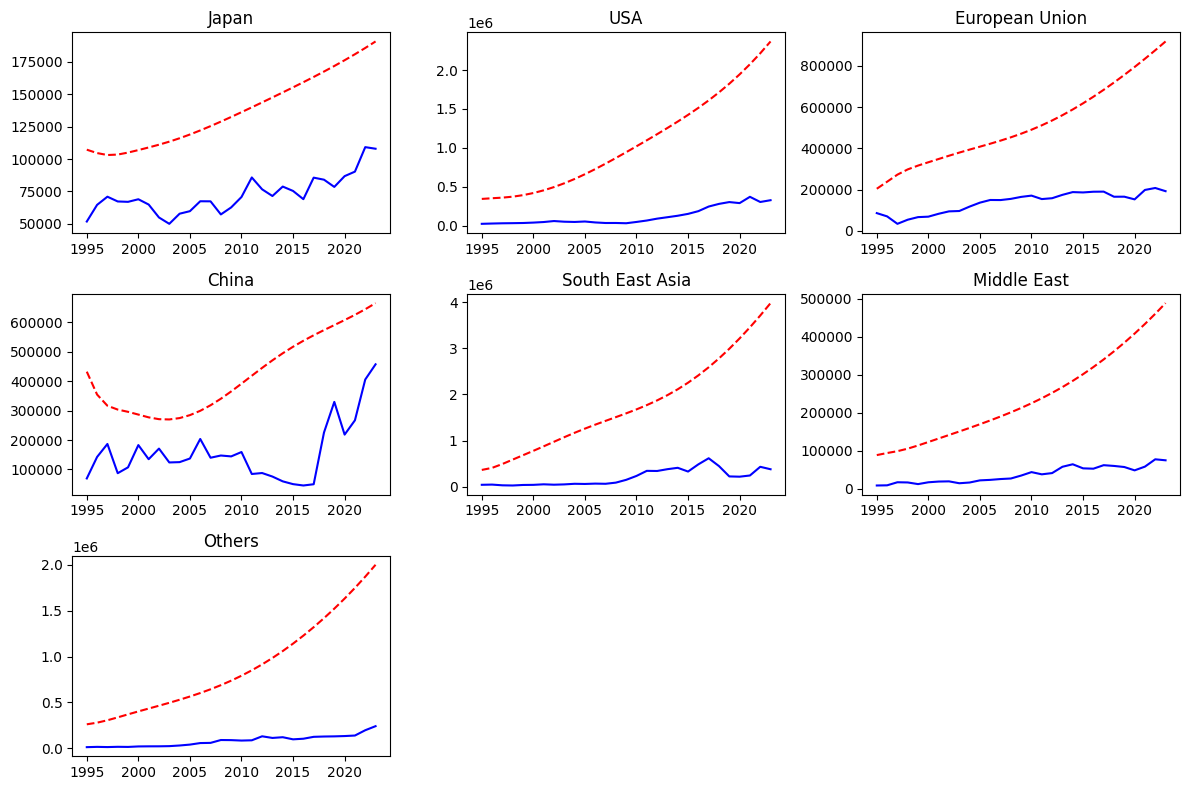

In [27]:
train=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']]

test=train
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
results = VAR(train_scaled)
results=results.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=np.power(test,3)
forecast_data=np.power(forecast_data,3)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Japan RMSE:", np.sqrt(mean_squared_error(test['Japan_Cbrt'], forecast_data['Japan_Cbrt'])))
print("USA RMSE:", np.sqrt(mean_squared_error(test['USA_Cbrt'], forecast_data['USA_Cbrt'])))
print("European Union RMSE:", np.sqrt(mean_squared_error(test['European_Union_Cbrt'], forecast_data['European_Union_Cbrt'])))
print("China RMSE:", np.sqrt(mean_squared_error(test['China_Cbrt'], forecast_data['China_Cbrt'])))
print("South East Asia RMSE:", np.sqrt(mean_squared_error(test['South_East_Asia_Cbrt'], forecast_data['South_East_Asia_Cbrt'])))
print("Middle East RMSE:", np.sqrt(mean_squared_error(test['Middle_East_Cbrt'], forecast_data['Middle_East_Cbrt'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Cbrt'], forecast_data['Others_Cbrt'])))
print(results.summary())
plot_series(test,forecast_data)
with open('model.pkl', 'wb') as file:
  pickle.dump(results, file)

**Function to be used for Deployment**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [29]:
def predict(x,region):
  train_data={
      'Japan_Cbrt':[51789, 64656, 70955, 67277, 66990, 68983, 64905, 54916, 50020, 57832, 59785, 67437, 67373, 57271, 62690, 70714, 85800, 76648, 71484, 78772, 75393, 69039, 85651, 84080, 78507, 86814, 90308, 109199, 107968],
      'USA_Cbrt':[26008, 29792, 32914, 34472, 36645, 41747, 49041, 61703, 53153, 50045, 55817, 43758, 36612, 36877, 33444, 50095, 68354, 92447, 110880, 129667, 153695, 188617, 247780, 281913, 305178, 291948, 372611, 306334, 329192],
      'European_Union_Cbrt':[86023, 70243, 34088, 54081, 66634, 68827, 82895, 94541, 96284, 117742, 136842, 149773, 149381, 155161, 164800, 170963, 154221, 158357, 174686, 188031, 186349, 189833, 190314, 165571, 165773, 152770, 198484, 207976, 192505],
      'China_Cbrt':[69387, 142448, 186537, 87211, 107136, 182771, 134767, 170811, 123738, 124826, 137076, 203513, 139792, 147312, 144290, 159147, 84515, 87776, 75783, 59519, 50042, 45443, 49701, 225519, 329479, 218343, 266989, 405547, 457215],
      'South_East_Asia_Cbrt':[41954, 46369, 30779, 26917, 38300, 40748, 52424, 44097, 50670, 63842, 60140, 67650, 63818, 88953, 149353, 233964, 343962, 340944, 380061, 409931, 328900, 484819, 616707, 446966, 223398, 217710, 243401, 431774, 378630],
      'Middle_East_Cbrt':[8800, 9236, 17310, 16798, 12460, 17236, 19159, 19668, 14711, 16624, 22270, 23585, 25752, 27177, 34907, 43983, 38155, 41419, 58040, 64608, 53905, 52973, 62220, 60232, 57387, 48606, 58426, 77677, 75046],
      'Others_Cbrt':[12315, 15453, 13236, 16177, 14867, 20161, 21279, 21561, 23441, 30418, 40234, 56924, 58972, 90083, 88953, 84225, 87014, 130623, 112822, 120716, 97609, 104224, 124871, 128278, 129929, 133319, 139045, 196780, 241045]
  }
  train_data=pd.DataFrame(train_data)
  scaler=StandardScaler()
  train_scaled = pd.DataFrame(scaler.fit_transform(np.cbrt(train_data)),
                                columns=train_data.columns,
                                index=train_data.index)
  if(x<2025 or x>2030):
    return " Please enter the year within the range 2025-2030"
  with open('model.pkl','rb') as file:
    model=pickle.load(file)
  steps=x-2023
  lag_order = model.k_ar
  forecast_scaled = model.forecast(train_scaled.values[-lag_order:], steps=steps)
  forecast = scaler.inverse_transform(forecast_scaled)
  forecast_data = pd.DataFrame(forecast, columns=train_data.columns)
  forecast_data = np.power(forecast_data, 3)
  if(region=="Japan"):
    region='Japan_Cbrt'
  elif(region=="South East Asia"):
    region='South_East_Asia_Cbrt'
  elif(region=="China"):
    region='China_Cbrt'
  elif(region=="USA"):
    region='USA_Cbrt'
  elif(region=="European Union"):
    region='European_Union_Cbrt'
  elif(region=="Middle East"):
    region='Middle_East_Cbrt'
  elif(region=="Others"):
    region='Others_Cbrt'
  else:
    return "Please enter a valid region"
  region_data=forecast_data[region]
  forecast_years=[]
  for i in range(len(region_data)):
    print("Year {} Prediction {}".format(2023+i+1,region_data[i]))
    forecast_years.append(2023+i+1)
  years=np.arange(1995,2024)
  plt.figure(figsize=(10,6))
  plt.plot(years,train_data[region],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_years,region_data.values,linestyle="-",label="Forecast Quantity from 2024 till {}".format(x))
  plt.legend()
  plt.xlabel("Years")
  plt.ylabel("Export Quantity in Metric Tons")
  plt.title("Forecast of Export Quantity from 2024 till {}".format(x))



Enter a year in the range 2025-2030:2025
Enter a region:USA
Year 2024 Prediction 345672.81619148067
Year 2025 Prediction 354416.78760271805


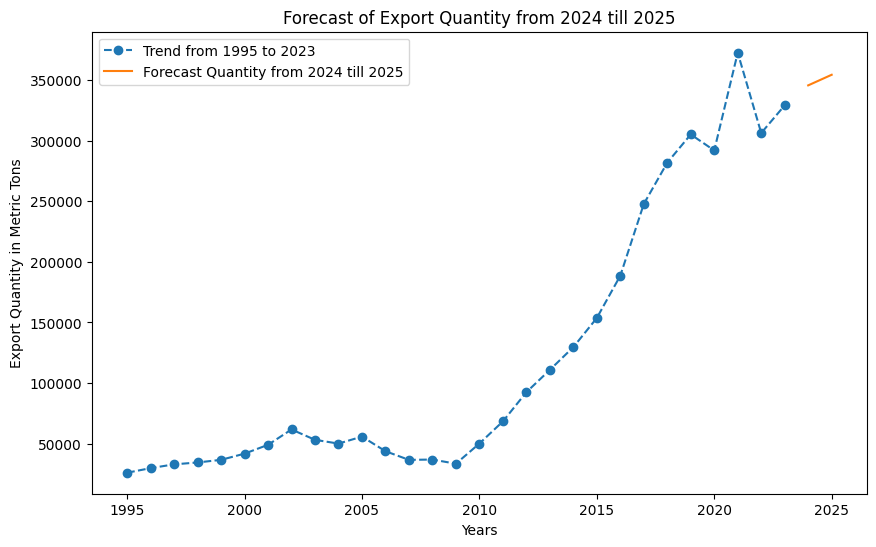

In [30]:
 x=int(input("Enter a year in the range 2025-2030:"))
 region=input("Enter a region:")
 predict(x,region)

Enter a year in the range 2025-2030:2026
Enter a region:Japan
Year 2024 Prediction 107229.6660382701
Year 2025 Prediction 104629.74528386336
Year 2026 Prediction 103105.9524104869


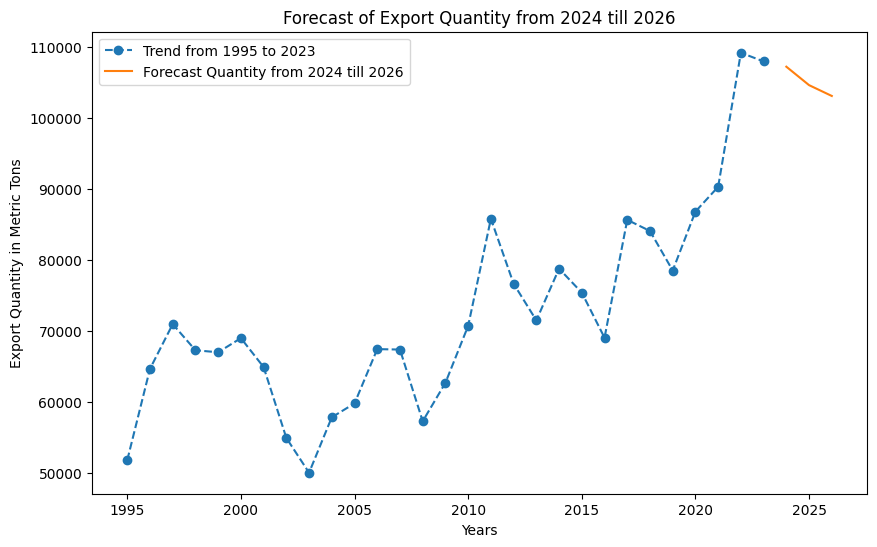

In [31]:
 x=int(input("Enter a year in the range 2025-2030:"))
 region=input("Enter a region:")
 predict(x,region)

Enter a year in the range 2025-2030:2029
Enter a region:Middle East
Year 2024 Prediction 88755.66326445488
Year 2025 Prediction 94181.96030902101
Year 2026 Prediction 99001.05687135695
Year 2027 Prediction 105691.96171383881
Year 2028 Prediction 114046.39300773817
Year 2029 Prediction 123141.97499727651


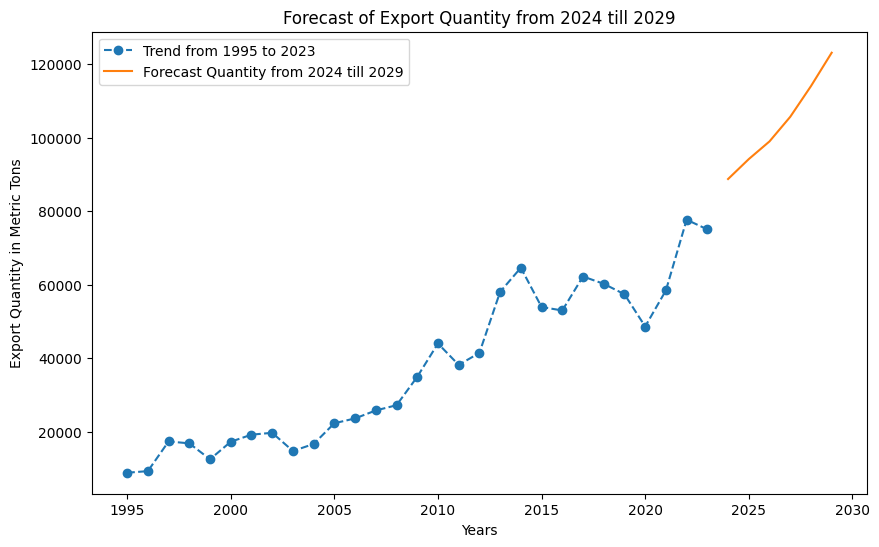

In [32]:
 x=int(input("Enter a year in the range 2025-2030:"))
 region=input("Enter a region:")
 predict(x,region)